In [8]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp, log10
import pandas as pd
from math import sin

# Exercise 1

In [2]:
def diff_equ(arg):
    """
    Function to calculate the value of the differential equation
    Args:
       arg: argument
 
    Returns: value of the differential equation
 
    """
    return arg * (arg - 1) * (arg - 2)

In [3]:
def euler_method(t_p: float, t_k: float, h: float, x_0: float, fun: callable):
    """
     Function to calculate the fixed points using the Euler method
      
    Args:
       t_p: start time
       t_k: end time
       h: step
       x_0: starting point
       fun: differential equation
  
    Returns: time points, fixed points
  
    """
    t_euler = np.arange(t_p, t_k, h)
    x_euler = [x_0] * len(t_euler)
    for idx in range(1, len(t_euler)):
        x_euler[idx] = x_euler[idx - 1] + h * fun(x_euler[idx - 1])
    return t_euler, x_euler, x_euler[-1]

In [4]:
euler_method(0, 4, 0.1, 1.4, diff_equ)[1]

[1.4,
 1.3663999999999998,
 1.3346788818943998,
 1.3049597303210705,
 1.277299896111273,
 1.2517022104952804,
 1.2281266236998007,
 1.2065011723486425,
 1.1867316325738386,
 1.1687095782927466,
 1.1523188172169878,
 1.1374403307194094,
 1.123955920295114,
 1.1117507874070116,
 1.1007152657147252,
 1.0907459003251414,
 1.0817460378938337,
 1.073626060197072,
 1.0663033653680754,
 1.0597021766941275,
 1.0537532389694797,
 1.048393446590914,
 1.0435654353173198,
 1.039217160274987,
 1.0353014757905012,
 1.0317757274608645,
 1.0286013630999884,
 1.0257435664900938,
 1.023170915947596,
 1.020855068379261,
 1.0187704685989096,
 1.0168940830798612,
 1.015205156945973,
 1.0136849927897353,
 1.012316749801976,
 1.0110852616697374,
 1.0099768717218138,
 1.0089792838573877,
 1.0080814278694046,
 1.0072733378618464]

In [5]:
def get_data(starting_points: list, method: callable):
    """
    Function to calculate the fixed points for different starting points
    Args:
       starting_points: list of different starting points
       method: type of numerical method to calculate the fixed points
  
    Returns: DataFrame with fixed points for different starting points
  
    """
    result = []
    for starting_point in starting_points:
        result.append(method(0, 4, 0.01, starting_point, diff_equ)[2])
    data = {"point": starting_points, "wynik": result}
    df = pd.DataFrame(data)
    return df

In [6]:
get_data([-0.000001, 0.991, 1.999999], euler_method)

,point,wynik
0,-0.000001,-0.002711
1,0.991000,0.999837
2,1.999999,1.997310


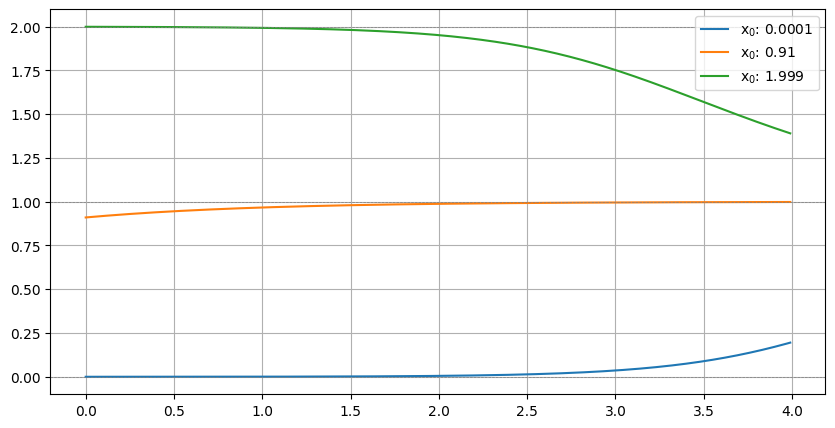

In [7]:
plt.figure(figsize=(10, 5))
for point in [0.0001, 0.91, 1.999]:
    time, fixed_points = euler_method(0, 4, 0.01, point, diff_equ)[:2]
    plt.plot(time, fixed_points, label=f"x$_0$: {point}")
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axhline(1, color='grey', lw=0.5, ls='--')
plt.axhline(2, color='grey', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

Stability analysis: x* = 1.0 is a stable point, x* = 0.0 and x* = 2.0 are unstable points.

# Exercise 2

In [10]:
def diff_equ2a(x, y):
    dxdt = y
    dydt = -x
    return [dxdt, dydt]


def diff_equ2b(x, y):
    dxdt = y
    dydt = -sin(x)
    return [dxdt, dydt]


def diff_equ2c(x, y):
    dxdt = y
    dydt = -x * (1 - x) * (1 + x)
    return [dxdt, dydt]


def diff_equ2d(x, y):
    dxdt = y
    dydt = x * (1 - x) * (1 + x)
    return [dxdt, dydt]

In [44]:
def RK4_method(t_p: int, t_k: int, h: float, x_0: float, y_0: float, fun: callable):
    """
    Function to calculate the fixed points using the Runge-Kutta method
    Args:
      y_0: 
      t_p: start time
      t_k: end time
      h: step size
      x_0: starting point
      fun: function to calculate the value of the differential equation
  
    Returns: fixed points, time points, last fixed point
  
    """
    t_RK4 = np.arange(t_p, t_k, h)
    x_RK4 = [x_0] * len(t_RK4)
    y_RK4 = [y_0] * len(t_RK4)
    for t in range(len(t_RK4)):
        kx, ky = fun(x_RK4[t - 1], y_RK4[t - 1])
        X, Y = fun(x_RK4[t - 1] + kx / 2, y_RK4[t - 1] + ky / 2)
        x_RK4[t], y_RK4[t] = x_RK4[t - 1] + h*X, y_RK4[t - 1] + h*Y
    return x_RK4, y_RK4

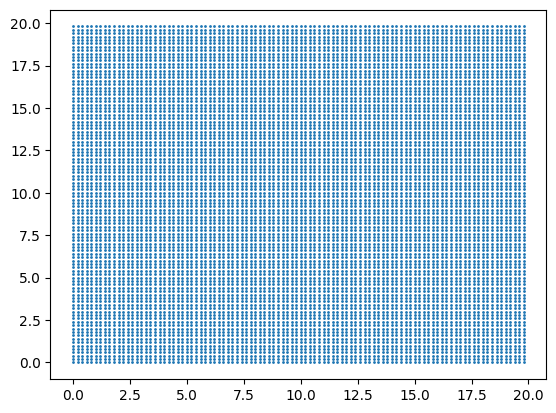

In [29]:
min_X, max_X, min_Y, max_Y = 0., 20, 0., 20
x = np.arange(min_X, max_X, (max_X - min_X) / 100)
y = np.arange(min_Y, max_Y, (max_Y - min_Y) / 100)
starting_points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
plt.plot(starting_points[:, 0], starting_points[:, 1], 'o', markersize=1)
plt.show()

In [42]:
def get_data_xy(points: np.ndarray, method: callable):
    """
    Function to calculate the fixed points for different starting points
    Args:
       points: list of different starting points
       method: type of numerical method to calculate the fixed points
  
    Returns: DataFrame with fixed points for different starting points
  
    """
    results_x = []
    results_y = []
    for idxs in range(len(points)):
        xs, ys = method(0, 4, 0.01, points[idxs, 0], points[idxs, 1], diff_equ2c)
        results_x.append(xs)
        results_y.append(ys)
    return results_x, results_y

C:\Users\48503\AppData\Local\Temp\ipykernel_12620\3293805008.py:13: RuntimeWarning: overflow encountered in scalar multiply
  dydt = -x*(1-x)*(1+x)


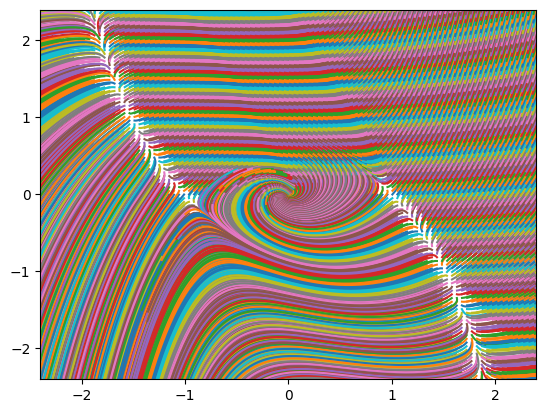

In [52]:
min_X, max_X, min_Y, max_Y = -2.4, 2.4, -2.4, 2.4
x = np.arange(min_X, max_X, (max_X - min_X) / 100)
y = np.arange(min_Y, max_Y, (max_Y - min_Y) / 100)
starting_points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
results_X, results_Y = get_data_xy(starting_points, RK4_method)
for idx in range(len(results_X)):
    plt.plot(results_X[idx], results_Y[idx])
plt.xlim(-2.4, 2.4)
plt.ylim(-2.4, 2.4)
plt.show()